In [2]:
%matplotlib inline
import numpy as np
import pylab as plt
from scipy.signal import convolve2d

In [3]:
def fft2(A):
    '''Performs 2D fft then shifts'''
    return np.fft.fftshift(np.fft.fft2(A))

def ifft2(A):
    '''Assumes A has shifted frequency to center.
    Unshifts and applies ifft'''
    return np.fft.ifft2(np.fft.ifftshift(A))



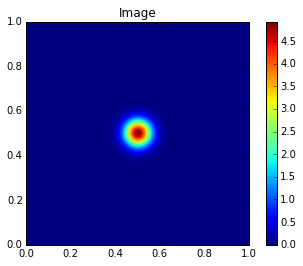

In [21]:
obsRes = 100
x1,y1 = np.linspace(0,1,obsRes), np.linspace(0,1,obsRes)
X1,Y1 = np.meshgrid(x1,y1)

imRes = 100
x0,y0 = np.linspace(0,1,imRes), np.linspace(0,1,imRes)
X0,Y0 = np.meshgrid(x0,y0)

components = [[0.5,0.5,5]]
fwhm = [0.05]
image = np.zeros([imRes,imRes])
for c,f in zip(components,fwhm):
    image += c[2]*np.exp(-((X0 - c[0])**2 + (Y0 - c[1])**2)/(np.log(2)*2.*f**2))
plt.imshow(image,extent=[x0[0],x0[-1],y0[0],y0[-1]],origin='lower')
plt.colorbar()
plt.title("Image")
plt.show()

d0 = 0.5#distance to screen



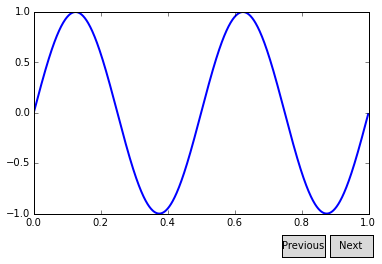

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Button

freqs = np.arange(2, 20, 3)

fig, ax = plt.subplots()
plt.subplots_adjust(bottom=0.2)
t = np.arange(0.0, 1.0, 0.001)
s = np.sin(2*np.pi*freqs[0]*t)
l, = plt.plot(t, s, lw=2)

fig.get_default_bbox_extra_artists
class Index(object):
    ind = 0

    def next(self, event):
        self.ind += 1
        i = self.ind % len(freqs)
        ydata = np.sin(2*np.pi*freqs[i]*t)
        l.set_ydata(ydata)
        plt.draw()

    def prev(self, event):
        self.ind -= 1
        i = self.ind % len(freqs)
        ydata = np.sin(2*np.pi*freqs[i]*t)
        l.set_ydata(ydata)
        plt.draw()

callback = Index()
axprev = plt.axes([0.7, 0.05, 0.1, 0.075])
axnext = plt.axes([0.81, 0.05, 0.1, 0.075])
axprev.set_axes()
bnext = Button(axnext, 'Next')
bnext.on_clicked(callback.next)
bprev = Button(axprev, 'Previous')
bprev.on_clicked(callback.prev)

plt.show()

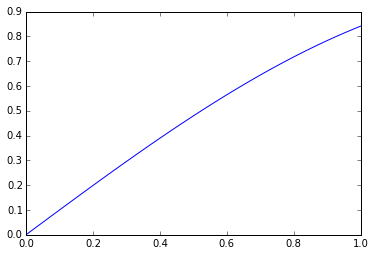

In [4]:
from matplotlib.widgets import  RectangleSelector
from pylab import *

def onselect(eclick, erelease):
  'eclick and erelease are matplotlib events at press and release'
  print(' startposition : (%f, %f)' % (eclick.xdata, eclick.ydata))
  print(' endposition   : (%f, %f)' % (erelease.xdata, erelease.ydata))
  print(' used button   : ', eclick.button)

def toggle_selector(event):
    print(' Key pressed.')
    if event.key in ['Q', 'q'] and toggle_selector.RS.active:
        print(' RectangleSelector deactivated.')
        toggle_selector.RS.set_active(False)
    if event.key in ['A', 'a'] and not toggle_selector.RS.active:
        print(' RectangleSelector activated.')
        toggle_selector.RS.set_active(True)

x = arange(100)/(99.0)
y = sin(x)
fig = figure
ax = subplot(111)
ax.plot(x,y)

toggle_selector.RS = RectangleSelector(ax, onselect, drawtype='line')
connect('key_press_event', toggle_selector)
show()

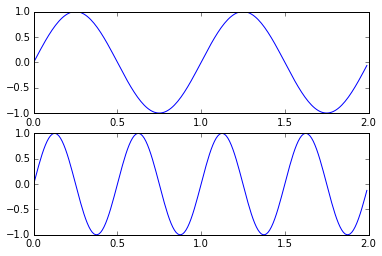

In [5]:
from matplotlib.widgets import MultiCursor
from pylab import figure, show, np

t = np.arange(0.0, 2.0, 0.01)
s1 = np.sin(2*np.pi*t)
s2 = np.sin(4*np.pi*t)
fig = figure()
ax1 = fig.add_subplot(211)
ax1.plot(t, s1)

ax2 = fig.add_subplot(212, sharex=ax1)
ax2.plot(t, s2)

multi = MultiCursor(fig.canvas, (ax1, ax2), color='r', lw=1,
                    horizOn=False, vertOn=True)
show()